# Image dataset
We will work on the MNIST dataset. Each image has a handwritten digit, e.g., 0,1,2,3,4,5,6,7,8,9. The task is to train a neural network model by 60,000 images (training dataset), and then predict the class label for each of the testing image, 0,1,2,3,4,5,6,7,8, or 9. There are10,000 images in the testing dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load training and testing dataset
from google.colab import drive
drive.mount('/content/gdrive')
data_path = "/content/gdrive/My Drive/Data/"

train_data = np.loadtxt(data_path + "mnist_train.csv",  delimiter=",") #load file as a matrix
test_data = np.loadtxt(data_path + "mnist_test.csv",  delimiter=",") 

Mounted at /content/gdrive


In [ ]:
# the number of training images we have
train_data.shape 

(60000, 785)

In [ ]:
# the number of testing images we have
test_data.shape 

(10000, 785)

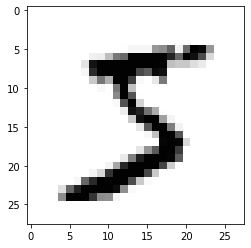

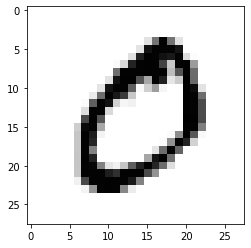

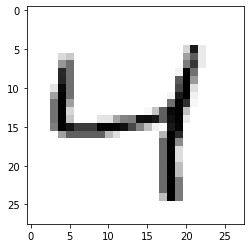

In [ ]:
image_size = 28 # width and length
image_pixels = image_size * image_size

# Normalize the pixels range from [0 255] to [0.01, 1]. 
# To avoid 0 values as inputs, each pixel is multiplied by 0.99 / 255, and then adding 0.01.
train_imgs = np.asfarray(train_data[:, 1:]) * 0.99 / 255 + 0.01 #The slicing operator [:, 1:0] Will grab all rows [1-6000] and coloumns [1-785] 
test_imgs = np.asfarray(test_data[:, 1:]) * 0.99 / 255 + 0.01  #

for i in range(3):
    img = train_imgs[i].reshape((image_size,image_size))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [ ]:
# the first column is the label
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])
print(test_labels[1:10,:])

[[2.]
 [1.]
 [0.]
 [4.]
 [1.]
 [4.]
 [9.]
 [5.]
 [9.]]


In [ ]:
# You may want to make one-hot encoding for the labels 
lr = np.arange(10)
for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


In [ ]:
#Then transform training and testing labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)

print(test_labels_one_hot[1:10,:])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## (8 points) implement a Multi-layer Neural Network model as a classifier. It is unnecessary to write the backpropagation training process by yourself. You can use machine learning libraries for training the neural network.

### (a) (1pts) In the multi-layer neural network you designed, how many hidden layers, and how many hidden units? How many parameters to learn in your model?

The Multi-Layer Perceptron (MLP) designed below produces relatively high accurate results on both training and test data. The neural network has 784 input parameters, 1 hidden layer with 80 neurons and 10 neurons on it's output layer. Therefore, the total number of parameters are:

$Parameters = 784 \times 80 + 80 \times 10 + 90 (Bias) = 63,610$

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

#defining the neural network


nn = Sequential([
               Dense(80, input_dim = 784, activation='relu'),
               Dense(10, activation='softmax') 
])

nn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = nn.fit(train_imgs,train_labels_one_hot, epochs = 40 , batch_size=64)

Epoch 1/40
938/938 [==============================] - 4s 4ms/step - loss: 0.3485 - accuracy: 0.9017
Epoch 2/40
938/938 [==============================] - 3s 4ms/step - loss: 0.1620 - accuracy: 0.9536
Epoch 3/40
938/938 [==============================] - 3s 4ms/step - loss: 0.1172 - accuracy: 0.9660
Epoch 4/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0926 - accuracy: 0.9725
Epoch 5/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0755 - accuracy: 0.9774
Epoch 6/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0641 - accuracy: 0.9812
Epoch 7/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0533 - accuracy: 0.9844
Epoch 8/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0456 - accuracy: 0.9863
Epoch 9/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0393 - accuracy: 0.9884
Epoch 10/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0348 - accuracy: 0.9897

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                62800     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 63,610
Trainable params: 63,610
Non-trainable params: 0
_________________________________________________________________


### (b) (1pts) Show your learning curve (the decrease of loss function over iterations), and make sure that your model is well-trained.




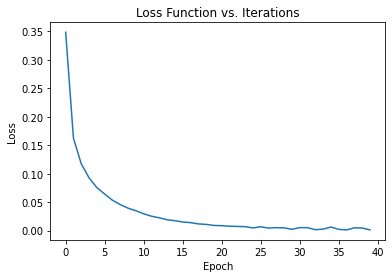

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Loss Function vs. Iterations')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### (C) (1pts) what is the classification accuracy on your training data? And on the testing data? Hint: accuracy higher than 0.94 is expected.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
prob_matrix = nn.predict(test_imgs) #returns an array of length 10000 whose elements are 10-element arrays with probabilities


def probability_to_decision(probability_matrix):
  predictions = []

  for i in range(len(probability_matrix)):
    predictions.append(np.argmax(probability_matrix[i])) #appends the index whose value is the maximum within a given array

  return predictions

training_predictions = probability_to_decision(nn.predict(train_imgs))
test_predictions = probability_to_decision(prob_matrix)

print("Accuracy Score on Testing Data: ", accuracy_score(test_predictions, test_labels))
print("Accuracy Score on Training Data: ", accuracy_score(training_predictions, train_labels))

Accuracy Score on Testing Data:  0.9772
Accuracy Score on Training Data:  0.9999166666666667


### (d) (2pts) please show the confusion matrix from your prediction results on the testing data, and discuss what you can observe from the confusion matrix (how the model made what kinds of wrong classifications).

In the confusion matrix below, the diagonal lines represent the number of accurately classified samples for each class. For example, the first diagonal tells us that 967 samples of class '0' were accurately classified as '0' by our MLP model. The off-diagonal numbers indicate the number of errors the model made. For example the value in row labeled '4' with column labeled '9' indicates that there were 11 instances where the model predicted a sample to '9' when in reality, it's true label was '4'. This number is the highest non-diagonal value in the confusion matrix, which indicates that our model has the toughest time recognizing between the number 4 and number 9, however, this number is significantly lower than the diagonal values. The other two highest rate of missclassification is when the model predicted '9' when the true value was '3' and when the model predicted '2' when the actual value was '7', each of which has a misclassification value of 10. 

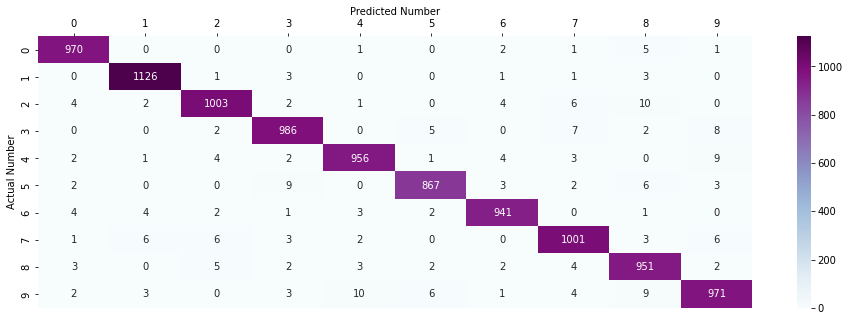

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

plt.figure(figsize = (16,5))
ax = plt.subplot()
conf_matrix = confusion_matrix(test_labels, test_predictions)
sn.heatmap(conf_matrix, ax = ax, annot=True, fmt='g', cmap='BuPu')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Predicted Number')
ax.set_ylabel('Actual Number');


### (e) (2pts) please report the precision, recall and F1-measure for each of the 10 classes, and the Marco-F1 value as an overall evaluation score.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(classification_report(test_labels,test_predictions))
print("F1 Macro Score for MLP Model #1: ", f1_score(test_labels, test_predictions, average='macro'))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       980
         1.0       0.99      0.99      0.99      1135
         2.0       0.98      0.97      0.98      1032
         3.0       0.98      0.98      0.98      1010
         4.0       0.98      0.97      0.98       982
         5.0       0.98      0.97      0.98       892
         6.0       0.98      0.98      0.98       958
         7.0       0.97      0.97      0.97      1028
         8.0       0.96      0.98      0.97       974
         9.0       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

F1 Macro Score for MLP Model #1:  0.9770709917430167


### (f) (1pts) Please compare the Marco-F1 score of your 3 different models (with different number of parameters), and discuss which one is better and why.

Below we build two more MLP models with different number of parameters. The three models, number of parameters and resulting macro-F1 score on testing data are summarized below

1. For Model #1, we have 1 hidden layers with 80 hidden units each with a relu activation funcntion, and an output layer with 10 units. The number of parameters in this fully connected MLP is:  Parameters = (784 x 80) + (80 x 10) + 90 (Bias)  = 63,610. F1 Macro Score for MLP Model #1:  0.9770709917430167
2. For Model #2, we have 2 hidden layers, each with 20 hidden units with a relu activation fcuntion, and an output layer with 10 units. The number of parameters in this fully connected MLP is:  Parameters = (784 x 20) + (20 x 20) + (20 x 10) + 50 (Bias) = 16,330. F1 Macro Score for MLP Model #2:  0.9606301491190019
3. For Model #3, we have 2 hidden layers, each with 200 hidden units with a relu activation fcuntion, and an output layer with 10 units. The number of parameters in this fully connected MLP is:  Parameters = (784 x 200) + (200 x 200) + (200 x 10) + 510 (Bias) =  199,210. F1 Macro Score for MLP Model #3:  0.9816683213182724


Note that the Macro-F1 Score is used to assess the quality of different models of multiclass problems where all classes are given equal contribution regarless of the number of instances. From the three models discussed above, Model #3 has the highest Macro Score and is therefore the superior model since it has higher accuracy than the remaining models. Note that this is probably due to the high number of parameters, they are possibly able to capture more significant data that improves their accuracy. 

In [ ]:
# MLP model #2 

nn2 = Sequential([
                  Dense(20, input_dim = 784, activation='relu'),
                  Dense(20, activation = 'relu'),
                  Dense(10, activation = 'softmax')
])

nn2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = nn2.fit(train_imgs,train_labels_one_hot, epochs = 40 , batch_size=64)

Epoch 1/40
938/938 [==============================] - 2s 2ms/step - loss: 0.4666 - accuracy: 0.8639
Epoch 2/40
938/938 [==============================] - 2s 2ms/step - loss: 0.2393 - accuracy: 0.9306
Epoch 3/40
938/938 [==============================] - 2s 2ms/step - loss: 0.1978 - accuracy: 0.9427
Epoch 4/40
938/938 [==============================] - 2s 2ms/step - loss: 0.1713 - accuracy: 0.9492
Epoch 5/40
938/938 [==============================] - 2s 2ms/step - loss: 0.1552 - accuracy: 0.9539
Epoch 6/40
938/938 [==============================] - 2s 2ms/step - loss: 0.1415 - accuracy: 0.9566
Epoch 7/40
938/938 [==============================] - 2s 2ms/step - loss: 0.1317 - accuracy: 0.9602
Epoch 8/40
938/938 [==============================] - 2s 2ms/step - loss: 0.1247 - accuracy: 0.9617
Epoch 9/40
938/938 [==============================] - 2s 2ms/step - loss: 0.1188 - accuracy: 0.9635
Epoch 10/40
938/938 [==============================] - 2s 2ms/step - loss: 0.1108 - accuracy: 0.9652

In [ ]:
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Comparison Metrics for Model #2

prob_matrix2 = nn2.predict(test_imgs) #returns an array of length 10000 whose elements are 10-element arrays with probabilities
test_predictions_nn2 = probability_to_decision(prob_matrix2)
print(classification_report(test_labels,test_predictions_nn2))
print("F1 Macro Score for MLP Model #2: ", f1_score(test_labels, test_predictions_nn2, average='macro'))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       980
         1.0       1.00      0.97      0.98      1135
         2.0       0.97      0.95      0.96      1032
         3.0       0.93      0.96      0.95      1010
         4.0       0.97      0.94      0.95       982
         5.0       0.95      0.95      0.95       892
         6.0       0.96      0.98      0.97       958
         7.0       0.97      0.96      0.97      1028
         8.0       0.94      0.96      0.95       974
         9.0       0.95      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

F1 Macro Score for MLP Model #2:  0.9606301491190019


In [ ]:
#MLP model #3

nn3 = Sequential([
                  Dense(200, input_dim = 784, activation='relu'),
                  Dense(200, activation='relu'),
                  Dense(10, activation = 'softmax') 

])

nn3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = nn3.fit(train_imgs,train_labels_one_hot, epochs = 40 , batch_size=64)

Epoch 1/40
938/938 [==============================] - 6s 6ms/step - loss: 0.2369 - accuracy: 0.9312
Epoch 2/40
938/938 [==============================] - 7s 8ms/step - loss: 0.0953 - accuracy: 0.9716
Epoch 3/40
938/938 [==============================] - 7s 8ms/step - loss: 0.0642 - accuracy: 0.9800
Epoch 4/40
938/938 [==============================] - 7s 7ms/step - loss: 0.0476 - accuracy: 0.9849
Epoch 5/40
938/938 [==============================] - 7s 7ms/step - loss: 0.0356 - accuracy: 0.9883
Epoch 6/40
938/938 [==============================] - 7s 7ms/step - loss: 0.0303 - accuracy: 0.9897
Epoch 7/40
938/938 [==============================] - 7s 8ms/step - loss: 0.0249 - accuracy: 0.9916
Epoch 8/40
938/938 [==============================] - 7s 8ms/step - loss: 0.0188 - accuracy: 0.9934
Epoch 9/40
938/938 [==============================] - 7s 8ms/step - loss: 0.0174 - accuracy: 0.9939
Epoch 10/40
938/938 [==============================] - 7s 8ms/step - loss: 0.0168 - accuracy: 0.9942

In [ ]:
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_6 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Comparison Metrics for Model #3

prob_matrix3 = nn3.predict(test_imgs) #returns an array of length 10000 whose elements are 10-element arrays with probabilities
test_predictions_nn3 = probability_to_decision(prob_matrix3)
print(classification_report(test_labels,test_predictions_nn3))
print("F1 Macro Score for MLP Model #3: ", f1_score(test_labels, test_predictions_nn3, average='macro'))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       980
         1.0       0.99      0.99      0.99      1135
         2.0       0.99      0.97      0.98      1032
         3.0       0.96      0.99      0.97      1010
         4.0       0.99      0.98      0.98       982
         5.0       0.98      0.97      0.98       892
         6.0       0.99      0.98      0.99       958
         7.0       0.98      0.98      0.98      1028
         8.0       0.98      0.98      0.98       974
         9.0       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

F1 Macro Score for MLP Model #3:  0.9816683213182724


## (2) Implement the Convolutional Neural Network (CNN) model. 

### (a) (1pts) In the CNN model you designed, how many convolution layers? For each convolution layer, what’s the size of filter (local receptive field), and stride step? How pooling is applied? How many parameters to learn in your model?

Here we will utilize Keras to build a CNN. We will use a stack of simple Conv2D() and MaxPooling to define our CNN. 

The Conv2D() function will create feature maps by sliding a filter across the image and performing a weighted sum at each step.  This funciton has the following parameters that need to be defined.

1. filters = takes an integer with the number of feature maps to construct. Recall that each feature map attempts to identify a single feature in the image. 
2. kernal size = integer or tuple defining the size of the filter to be applied against each image.
3. strides = integer or tuple defining the step to move the filter in each direction (horizontally and vertically)
4. activation = activation function to be applied in each neuron

The MaxPooling2D(pool_size = pool_size ) creates a condensed version of a feature map by picking the activation with highest value in a 2D region of space defined by the pool_size parameter. 

In [ ]:
image_size = 28 # width and length
image_pixels = image_size * image_size

train_imgs_reshaped = np.expand_dims(train_imgs.reshape(60000,28,28), axis = 3)
test_imgs_reshaped = np.expand_dims(test_imgs.reshape(10000,28,28), axis=3)
test_imgs_reshaped.shape

(10000, 28, 28, 1)

On Model #1 of our CNN, we will apply a **single stack of a convolution layer which will apply 5 different filters of size = (4,4) by sliding across our image with stride step = (1,1)**. Since each feature map shares the same weight, the number of learnable parameters after this convolution layer will be 5 x (4 x 4 + 1)  = 85 . The number of neurons after the convolution layer is (28 - 4)/1 + 1 = (25x25). Since we have 5 filter, the total number of neurons in this layer is 5 x (25 x 25). Thereafter, we will perform a **Max Pooling of size (2 x 2) with a stride of 2 in each feature map which will pick out the neuron with maximum value in a region of 2x2**. The number of neurons then reduces to (12 x 12) x 5. The condensed feature maps will be then passed onto 10 neurons in the output layer with a softmax activation function. **Thus the total number of learnable parameters for this model will be 7,295**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

n_filters = 5
filter_size = 4
stride_step = (1,1)
pool_size = (2,2)
activation = None

cnn = Sequential([
                  Conv2D(n_filters, filter_size, strides=stride_step, activation = activation, input_shape=(28,28,1)),
                  MaxPooling2D(pool_size = pool_size ),
                  Flatten(),
                  Dense(10, activation='softmax')
])

cnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history = cnn.fit(train_imgs_reshaped,train_labels_one_hot, epochs = 15, batch_size=64)

Epoch 1/15
938/938 [==============================] - 16s 17ms/step - loss: 0.4593 - accuracy: 0.8734
Epoch 2/15
938/938 [==============================] - 16s 17ms/step - loss: 0.2430 - accuracy: 0.9323
Epoch 3/15
938/938 [==============================] - 16s 17ms/step - loss: 0.1918 - accuracy: 0.9458
Epoch 4/15
938/938 [==============================] - 16s 17ms/step - loss: 0.1610 - accuracy: 0.9548
Epoch 5/15
938/938 [==============================] - 16s 17ms/step - loss: 0.1397 - accuracy: 0.9607
Epoch 6/15
938/938 [==============================] - 16s 17ms/step - loss: 0.1247 - accuracy: 0.9648
Epoch 7/15
938/938 [==============================] - 16s 17ms/step - loss: 0.1128 - accuracy: 0.9672
Epoch 8/15
938/938 [==============================] - 16s 17ms/step - loss: 0.1039 - accuracy: 0.9692
Epoch 9/15
938/938 [==============================] - 16s 17ms/step - loss: 0.0967 - accuracy: 0.9715
Epoch 10/15
938/938 [==============================] - 16s 17ms/step - loss: 0.090

In [ ]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 5)         85        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 5)         0         
_________________________________________________________________
flatten (Flatten)            (None, 720)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                7210      
Total params: 7,295
Trainable params: 7,295
Non-trainable params: 0
_________________________________________________________________


### (b) (1pts) Show your learning curve (the decrease of loss function over iterations), and make sure that your model is well-trained.


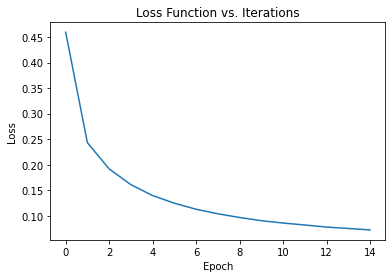

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.title('Loss Function vs. Iterations')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### (c) (1pts) what is the classification accuracy on your training data? And on the testing data? Hint: accuracy higher than 0.94 is expected.

In [ ]:
prob_arrays = cnn.predict(test_imgs_reshaped)
test_predictions_cnn1 = probability_to_decision(prob_arrays)
training_predictions_cnn1 = probability_to_decision(cnn.predict(train_imgs_reshaped))

print("Accuracy Score on Test Data: ", accuracy_score(test_labels, test_predictions_cnn1))
print("Accuracy Score on Training Data: ", accuracy_score(train_labels, training_predictions_cnn1))

Accuracy Score on Test Data:  0.971
Accuracy Score on Training Data:  0.9797333333333333


### (d) (2pts) please show the confusion matrix from your prediction results on the testing data, and discuss what you can observe from the confusion matrix (how the model made what kinds of wrong classifications).

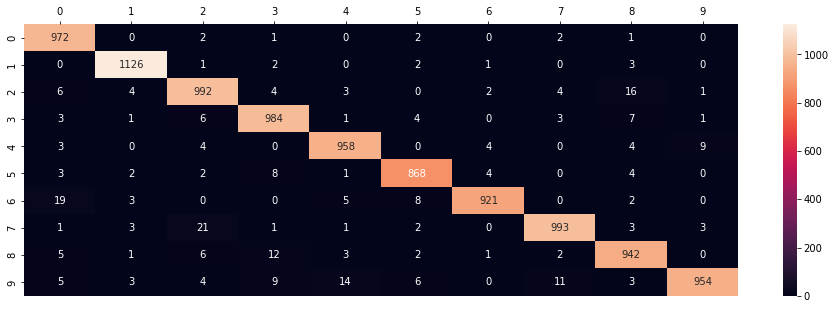

In [ ]:
conf_matrix = confusion_matrix(test_labels, test_predictions_cnn1)
plt.figure(figsize = (16,5))
ax = plt.subplot()
sn.heatmap(conf_matrix, ax = ax, annot=True, fmt='g')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()


### (e) (1.5 pts) please report the precision, recall and F1-measure for each of the 10 classes, and the Macro-F1 value as an overall evaluation score.

In [ ]:
print(classification_report(test_labels, test_predictions_cnn1))
print("F1 Macro Score for CNN Model #1: ", f1_score(test_labels, test_predictions_cnn1, average='macro'))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       980
         1.0       0.99      0.99      0.99      1135
         2.0       0.96      0.96      0.96      1032
         3.0       0.96      0.97      0.97      1010
         4.0       0.97      0.98      0.97       982
         5.0       0.97      0.97      0.97       892
         6.0       0.99      0.96      0.97       958
         7.0       0.98      0.97      0.97      1028
         8.0       0.96      0.97      0.96       974
         9.0       0.99      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

F1 Macro Score for CNN Model #1:  0.9708064721114766


### (f) (1.5 pts) Please compare the Macro-F1 score of your 3 different models (with different number of parameters), and discuss which one is better and why. Please compare the performance of your best CNN model and that of your best multi-layer neural network model. Which one is better?

Summaries of the 3 models:

1. On Model #1 of our CNN, we will use single stack of a convolution layer which will apply 5 different filters of size = (4,4) with stride step = (1,1). Thereafter, we will perform a Max Pooling of size (2 x 2) with a stride of 2 in each feature map which will pick out the neuron with maximum value in a region of 2x2. Then the values are passed onto 10 neurons with a softmax activation function **Thus the total number of learnable parameters for this model will be 7,295. F1 Macro Score for CNN Model #1:  0.9708064721114766**

2. In Model #2 we will use use two layes of convolution. At the first layer, we apply a 5 filters of size (4 x 4) with stride step (1, 1). In the second convolution layer, we will apply 10 filters of size (3 x 3) with stride step (1 x 1). The output of both convolution layers are passed through a max pooling of size (2 x 2) with stride step 2. **In this model, the total number of learnable parameters are 3,055 and the total execution time equals to 4m and 22s. F1 Macro Score for CNN Model #2:   0.9838117133260837** 

3. Model #3 will have two convolution layers, the first will utilize 3 filters of size (3 x 3) with stride step (1 x 1). The second will use 6 more filters of size (3 x 3) with step (1 x 1). Each convolution layers uses a 'relu' activation function on the activation which are then passed through a max pooling of size (2 x 2). The activations maps are then connected to a regular MLP with 80 hidden units in the first layer and 10 units in the output layer with a softmax activation function **The total number of learnable parameters for this model is 13,088 and the execution time is 3m and 29 seconds. F1 Macro Score for Model #3:  0.9865926401388665**

The CNN model with the highest Macro F1 score is CNN Model #3, achiecing  Macro Score of 0.9865. This model outperforms the best  MLP model previously discussed while having significantly less parameters to learn (13,088 compared to 199,210). It seems that performing convolution layers followed by pooling layer greatly improves the performance of the models. Even the second best CNN model outperforms our best MLP model. **The overall winner is CNN Model #3**

In [ ]:
# Model #2 

#Filters is the number of filters in the convolution output 
activation = None

cnn2 = Sequential([
                  Conv2D(filters = 5, kernel_size = (4, 4), strides = (1,1), activation = activation, input_shape=(28,28,1)),
                  MaxPooling2D(pool_size = (2,2) ),
                  Conv2D(filters = 10, kernel_size = (3, 3), strides = (1,1), activation = activation),
                  MaxPooling2D(pool_size = (2,2) ),
                  Flatten(),
                  Dense(10, activation='softmax')
])

cnn2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history = cnn2.fit(train_imgs_reshaped,train_labels_one_hot, epochs = 15, batch_size=64)

Epoch 1/15
938/938 [==============================] - 21s 22ms/step - loss: 0.3998 - accuracy: 0.8857
Epoch 2/15
938/938 [==============================] - 20s 21ms/step - loss: 0.1445 - accuracy: 0.9573
Epoch 3/15
938/938 [==============================] - 20s 21ms/step - loss: 0.1060 - accuracy: 0.9686
Epoch 4/15
938/938 [==============================] - 20s 21ms/step - loss: 0.0887 - accuracy: 0.9732
Epoch 5/15
938/938 [==============================] - 20s 21ms/step - loss: 0.0783 - accuracy: 0.9761
Epoch 6/15
938/938 [==============================] - 19s 21ms/step - loss: 0.0714 - accuracy: 0.9785
Epoch 7/15
938/938 [==============================] - 20s 21ms/step - loss: 0.0670 - accuracy: 0.9800
Epoch 8/15
938/938 [==============================] - 21s 23ms/step - loss: 0.0623 - accuracy: 0.9813
Epoch 9/15
938/938 [==============================] - 19s 20ms/step - loss: 0.0582 - accuracy: 0.9825
Epoch 10/15
938/938 [==============================] - 19s 20ms/step - loss: 0.056

In [ ]:
cnn2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 5)         85        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 10)        460       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2510      
Total params: 3,055
Trainable params: 3,055
Non-trainable params: 0
____________________________________________________

In [ ]:
prob_arrays2 = cnn2.predict(test_imgs_reshaped)
test_predictions_cnn2 = probability_to_decision(prob_arrays2)
print(classification_report(test_labels,test_predictions_cnn2))
print("Accuracy Score on Test Data: ", accuracy_score(test_labels, test_predictions_cnn2))
print("F1 Macro Score for CNN Model #2: ", f1_score(test_labels, test_predictions_cnn2, average='macro'))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       980
         1.0       0.99      1.00      0.99      1135
         2.0       0.98      0.98      0.98      1032
         3.0       0.98      0.99      0.98      1010
         4.0       0.99      0.98      0.99       982
         5.0       0.98      0.99      0.98       892
         6.0       0.99      0.98      0.99       958
         7.0       0.98      0.98      0.98      1028
         8.0       0.99      0.97      0.98       974
         9.0       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy Score on Test Data:  0.9839
F1 Macro Score for CNN Model #2:  0.9838117133260837


In [ ]:
# Model 3

activation = 'relu'

cnn3 = Sequential([
                  Conv2D(filters = 3, kernel_size = (3, 3), strides = (1,1), activation = activation, input_shape=(28,28,1)),
                  MaxPooling2D(pool_size = (2,2) ),
                  Conv2D(filters = 6, kernel_size = (3, 3), strides = (1,1), activation = activation),
                  MaxPooling2D(pool_size = (2,2) ),
                  Flatten(),
                  Dense(80, activation='relu'),
                  Dense(10, activation='softmax')
])

cnn3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history = cnn3.fit(train_imgs_reshaped,train_labels_one_hot, epochs = 15, batch_size=64)

Epoch 1/15
938/938 [==============================] - 19s 19ms/step - loss: 0.3744 - accuracy: 0.8900
Epoch 2/15
938/938 [==============================] - 18s 19ms/step - loss: 0.1271 - accuracy: 0.9617
Epoch 3/15
938/938 [==============================] - 18s 19ms/step - loss: 0.0970 - accuracy: 0.9703
Epoch 4/15
938/938 [==============================] - 18s 19ms/step - loss: 0.0800 - accuracy: 0.9754
Epoch 5/15
938/938 [==============================] - 18s 19ms/step - loss: 0.0688 - accuracy: 0.9793
Epoch 6/15
938/938 [==============================] - 18s 19ms/step - loss: 0.0609 - accuracy: 0.9802
Epoch 7/15
938/938 [==============================] - 18s 19ms/step - loss: 0.0530 - accuracy: 0.9831
Epoch 8/15
938/938 [==============================] - 18s 19ms/step - loss: 0.0482 - accuracy: 0.9845
Epoch 9/15
938/938 [==============================] - 18s 19ms/step - loss: 0.0438 - accuracy: 0.9858
Epoch 10/15
938/938 [==============================] - 18s 19ms/step - loss: 0.038

In [ ]:
cnn3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 6)         168       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 6)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 150)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 80)                12080     
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [ ]:
prob_arrays3 = cnn3.predict(test_imgs_reshaped)
test_predictions_cnn3 = probability_to_decision(prob_arrays3)
print(classification_report(test_labels,test_predictions_cnn3))
print("Accuracy Score on Test Data: ", accuracy_score(test_labels, test_predictions_cnn3))
print("F1 Macro Score for CNN Model #3: ", f1_score(test_labels, test_predictions_cnn3, average='macro'))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       980
         1.0       0.99      1.00      0.99      1135
         2.0       0.98      0.99      0.99      1032
         3.0       0.98      0.99      0.99      1010
         4.0       0.98      0.99      0.99       982
         5.0       0.99      0.98      0.99       892
         6.0       0.99      0.98      0.99       958
         7.0       0.99      0.98      0.98      1028
         8.0       0.98      0.98      0.98       974
         9.0       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Accuracy Score on Test Data:  0.9867
F1 Macro Score for CNN Model #3:  0.9865926401388665
